<a href="https://colab.research.google.com/github/Svetorus/Course-project-Data-Science-2/blob/master/course_project_Data_Science_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

import xgboost as xgb, lightgbm as lgbm, catboost as catb

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

pd.options.display.max_columns = 100

In [0]:
df = pd.read_csv("./course_project_train.csv")

In [0]:
test = pd.read_csv("./course_project_test.csv")

**Переименовал колонки в удобный вариант**

In [0]:
df.head(1)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0


In [0]:
df.columns = ['Home_Ownership','Annual_Income','Years_in_current_job','Tax_Liens','Number_of_Open_Accounts','Years_of_Credit_History','Maximum_Open_Credit','Number_of_Credit_Problems','Months_since_last_delinquent','Bankruptcies','Purpose','Term','Current_Loan_Amount','Current_Credit_Balance','Monthly_Debt','Credit_Score','Credit_Default']
df.shape

(7500, 17)

In [0]:
test.columns = ['Home_Ownership','Annual_Income','Years_in_current_job','Tax_Liens','Number_of_Open_Accounts','Years_of_Credit_History','Maximum_Open_Credit','Number_of_Credit_Problems','Months_since_last_delinquent','Bankruptcies','Purpose','Term','Current_Loan_Amount','Current_Credit_Balance','Monthly_Debt','Credit_Score']
test.shape

(2500, 16)

### Ищем выбросы
#### Annual_Income

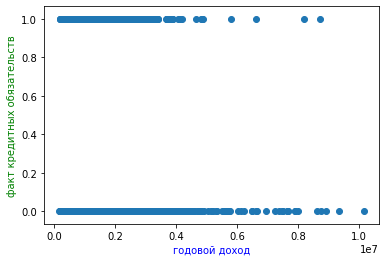

In [0]:
plt.scatter(df['Annual_Income'],df['Credit_Default'])
plt.xlabel('годовой доход', color='b')
plt.ylabel('факт кредитных обязательств',color='g');

In [0]:
df['Annual_Income'].nlargest(4)

6472    10149344.0
2200     9338880.0
1025     8923844.0
1984     8758449.0
Name: Annual_Income, dtype: float64

In [0]:
annual_income_max = df.loc[df['Annual_Income']<9500000,'Annual_Income'].max()
df.loc[df['Annual_Income']>9500000,'Annual_Income']=annual_income_max

In [0]:
test.loc[test['Annual_Income']>9500000,'Annual_Income']=annual_income_max

**Maximum_Open_Credit**

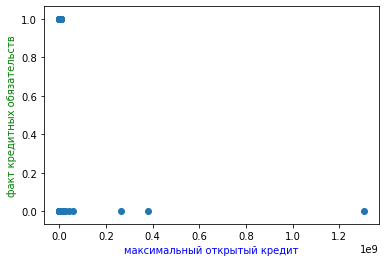

In [0]:
plt.scatter(df['Maximum_Open_Credit'],df['Credit_Default'])
plt.xlabel('максимальный открытый кредит', color='b')
plt.ylabel('факт кредитных обязательств',color='g');

In [0]:
df['Maximum_Open_Credit'].nlargest(5)

617     1.304726e+09
44      3.800523e+08
2617    2.655129e+08
2023    5.756256e+07
2763    4.092389e+07
Name: Maximum_Open_Credit, dtype: float64

Меняем опечатки, удаляем последние цифры

In [0]:
df.at[617, 'Maximum_Open_Credit'] = 30472600
df.at[44, 'Maximum_Open_Credit'] = 38005228
df.at[2617, 'Maximum_Open_Credit'] = 26551287
df.at[2023, 'Maximum_Open_Credit'] = 37562560

**Current_Loan_Amount**

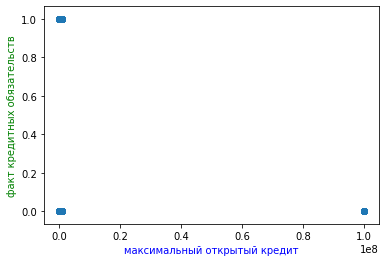

In [0]:
plt.scatter(df['Current_Loan_Amount'],df['Credit_Default'])
plt.xlabel('максимальный открытый кредит', color='b')
plt.ylabel('факт кредитных обязательств',color='g');

In [0]:
df_Current_mean = round(df.loc[df.Current_Loan_Amount<1000000,'Current_Loan_Amount'].mean())
df.loc[df['Current_Loan_Amount']>1000000,'Current_Loan_Amount']=df_Current_mean

In [0]:
test.loc[test['Current_Loan_Amount']>1000000,'Current_Loan_Amount']=df_Current_mean

**Current_Credit_Balance**

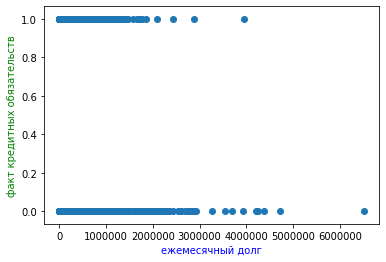

In [0]:
plt.scatter(df['Current_Credit_Balance'],df['Credit_Default'])
plt.xlabel('ежемесячный долг', color='b')
plt.ylabel('факт кредитных обязательств',color='g');

In [0]:
Credit_Balance_max=df.loc[df['Current_Credit_Balance']<4500000,'Current_Credit_Balance'].max()
df.loc[df['Current_Credit_Balance']>4500000,'Current_Credit_Balance']=Credit_Balance_max

In [0]:
test.loc[test['Current_Credit_Balance']>4500000,'Current_Credit_Balance']=Credit_Balance_max

**Monthly_Debt**

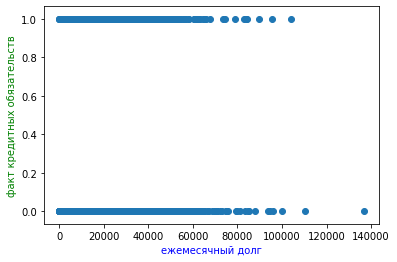

In [0]:
plt.scatter(df['Monthly_Debt'],df['Credit_Default'])
plt.xlabel('ежемесячный долг', color='b')
plt.ylabel('факт кредитных обязательств',color='g');

In [0]:
monthly_debt_max=df.loc[df['Monthly_Debt']<100000,'Monthly_Debt'].max()
df.loc[df['Monthly_Debt']>100000,'Monthly_Debt']=monthly_debt_max

**Меняем значения в Term**

In [0]:
df.loc[df['Term'] == 'Short Term','Term']=0
df.loc[df['Term'] == 'Long Term','Term']=1

In [0]:
test.loc[test['Term'] == 'Short Term','Term']=0
test.loc[test['Term'] == 'Long Term','Term']=1

**Credit_Score**

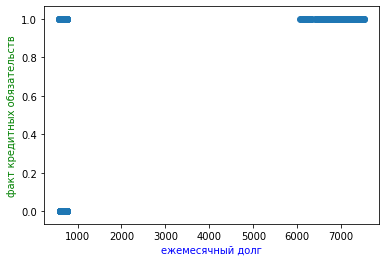

In [0]:
plt.scatter(df['Credit_Score'],df['Credit_Default'])
plt.xlabel('ежемесячный долг', color='b')
plt.ylabel('факт кредитных обязательств',color='g');

In [0]:
Credit_Score_1000 =df.loc[df['Credit_Score']<1000,:]
Credit_Score_1000_mode=round(Credit_Score_1000.loc[Credit_Score_1000['Credit_Default']==1,'Credit_Score'].mode()[0])
df.loc[df['Credit_Score']>1000,'Credit_Score'] = Credit_Score_1000_mode

In [0]:
test.loc[test['Credit_Score']>1000,'Credit_Score'] = Credit_Score_1000_mode

### Проверяем на пропущенные значения

In [0]:
len(df)-df.count()

Home_Ownership                     0
Annual_Income                   1557
Years_in_current_job             371
Tax_Liens                          0
Number_of_Open_Accounts            0
Years_of_Credit_History            0
Maximum_Open_Credit                0
Number_of_Credit_Problems          0
Months_since_last_delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current_Loan_Amount                0
Current_Credit_Balance             0
Monthly_Debt                       0
Credit_Score                    1557
Credit_Default                     0
dtype: int64

### Заполняем пропущенные значения средними

**Annual Income**

In [0]:
np.unique(df['Annual_Income'], return_counts=True)

(array([164597., 175845., 177251., ...,     nan,     nan,     nan]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [0]:
Annual_Income_mean = round(df['Annual_Income'].mean())
df['Annual_Income'] = df['Annual_Income'].fillna(Annual_Income_mean)

In [0]:
test['Annual_Income'] = test['Annual_Income'].fillna(Annual_Income_mean)

**Years_in_current_job**

In [0]:
Years_in_current_job_mode = df['Years_in_current_job'].mode()[0]
df['Years_in_current_job'] = df['Years_in_current_job'].fillna(Years_in_current_job_mode)

In [0]:
test['Years_in_current_job'] = test['Years_in_current_job'].fillna(Years_in_current_job_mode)

**Bankruptcies**

In [0]:
np.unique(df['Bankruptcies'], return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]),
 array([6660,  786,   31,    7,    2,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1]))

In [0]:
Bankruptcies_mode = df['Bankruptcies'].mode()[0]
df['Bankruptcies'] = df['Bankruptcies'].fillna(Bankruptcies_mode)

In [0]:
test['Bankruptcies'] = test['Bankruptcies'].fillna(Bankruptcies_mode)

**Credit_Score**

In [0]:
Credit_Score_mode = df['Credit_Score'].mode()[0]
df['Credit_Score'] = df['Credit_Score'].fillna(Credit_Score_mode)

In [0]:
test['Credit_Score'] = test['Credit_Score'].fillna(Credit_Score_mode)

**Months since last delinquent**

In [0]:
df['Months_since_last_delinquent'] = df['Months_since_last_delinquent'].replace(np.nan, 0)
df.loc[df['Months_since_last_delinquent'] > 0,'Months_since_last_delinquent'] = 1

In [0]:
test['Months_since_last_delinquent'] = test['Months_since_last_delinquent'].replace(np.nan, 0)
test.loc[test['Months_since_last_delinquent'] > 0,'Months_since_last_delinquent'] = 1

**Добавил новую фичу: разделил текущий открытый кредит  на max кредит**

In [0]:
df['range_credit'] = df['Current_Credit_Balance']/df['Maximum_Open_Credit']
range_credit_max = df.loc[df['range_credit']<1,'range_credit'].max()
df.loc[df['range_credit']==np.inf,'range_credit']=range_credit_max
range_credit_mode = df['range_credit'].mode()[0]
df['range_credit'] = df['range_credit'].fillna(range_credit_mode)

In [0]:
test['range_credit'] = test['Current_Credit_Balance']/test['Maximum_Open_Credit']
test.loc[test['range_credit']==np.inf,'range_credit']=range_credit_max
test['range_credit'] = test['range_credit'].fillna(range_credit_mode)

**Добавил новую фичу: разделил сумму кредита  на годовой доход**

In [0]:
df['check']= df['Monthly_Debt']/df['Annual_Income']
test['check']= test['Monthly_Debt']/test['Annual_Income']

### Разбиваем object колонки 

In [0]:
for cat_colname in df.select_dtypes(include='object'):
    df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)

In [0]:
for cat_colname in df.select_dtypes(include='object'):
    df = df.drop(cat_colname,axis=1)

In [0]:
for cat_colname in test.select_dtypes(include='object'):
    test = pd.concat([test, pd.get_dummies(test[cat_colname], prefix=cat_colname)], axis=1)

In [0]:
for cat_colname in test.select_dtypes(include='object'):
    test = test.drop(cat_colname,axis=1)

**Выделение целевой переменной**

In [0]:
target = df['Credit_Default']
df = df.drop('Credit_Default',axis=1)
TARGET_NAME = 'Credit_Default'

**Перименование столбцов в удобный вид**

In [0]:
df.columns = ['Annual_Income','Tax_Liens','Number_of_Open_Accounts','Years_of_Credit_History','Maximum_Open_Credit','Number_of_Credit_Problems','Months_since_last_delinquent','Bankruptcies','Term','Current_Loan_Amount','Current_Credit_Balance','Monthly_Debt','Credit_Score','range_credit','check','Have_Mortgage','Home_Mortgage','Own_Home','Home_Rent','job_1_year','10_years','2_years','3_years','4_years','5_years','6_years','7_years','8_years','9_years','1_year','Pur_business','Pur_buy_a_car','Pur_buy_house','Pur_debt','Pur_educational','Pue_home','Pur_major','Pur_medical','Pur_moving','Pur_other','Pur_energy','Pur_small_business','Pur_a_trip','Pur_vacation','Pur_wedding']

В test отсутствует колонка Pur_energy(почти все строчки = 0,только две строчки = 1 из всего датасета, мы ее удаляем)

In [0]:
df=df.drop('Pur_energy',axis=1)

In [0]:
test.columns = ['Annual_Income','Tax_Liens','Number_of_Open_Accounts','Years_of_Credit_History','Maximum_Open_Credit','Number_of_Credit_Problems','Months_since_last_delinquent','Bankruptcies','Term','Current_Loan_Amount','Current_Credit_Balance','Monthly_Debt','Credit_Score','range_credit','check','Have_Mortgage','Home_Mortgage','Own_Home','Home_Rent','job_1_year','10_years','2_years','3_years','4_years','5_years','6_years','7_years','8_years','9_years','1_year','Pur_business','Pur_buy_a_car','Pur_buy_house','Pur_debt','Pur_educational','Pue_home','Pur_major','Pur_medical','Pur_moving','Pur_other','Pur_small_business','Pur_a_trip','Pur_vacation','Pur_wedding']

### Нормализация данных

In [0]:
NUMERIC_FEATURE_NAMES = ['Annual_Income','Number_of_Open_Accounts','Years_of_Credit_History','Maximum_Open_Credit','Number_of_Credit_Problems','Bankruptcies','Current_Loan_Amount','Current_Credit_Balance','Monthly_Debt','Credit_Score','range_credit','check']

In [0]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUMERIC_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUMERIC_FEATURE_NAMES])

df = df_norm.copy()

In [0]:
scaler = StandardScaler()

test_norm = test.copy()
test_norm[NUMERIC_FEATURE_NAMES] = scaler.fit_transform(test_norm[NUMERIC_FEATURE_NAMES])

test = test_norm.copy()

### Разбиение на train и test

In [0]:
X = df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)

In [0]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

# MODEL

In [0]:
%%time

final_model = model_lgbm = catb.CatBoostClassifier(n_estimators= 500, max_depth= 3, learning_rate= 0.1,
                                                   class_weights=[1,2],silent=True, random_state=40)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4074
           1       0.59      0.66      0.62      1551

    accuracy                           0.78      5625
   macro avg       0.73      0.74      0.73      5625
weighted avg       0.79      0.78      0.78      5625

TEST

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1313
           1       0.52      0.54      0.53       562

    accuracy                           0.71      1875
   macro avg       0.66      0.66      0.66      1875
weighted avg       0.71      0.71      0.71      1875

CONFUSION MATRIX

col_0            0.0  1.0
Credit_Default           
0               1028  285
1                258  304
CPU times: user 9.59 s, sys: 5.14 s, total: 14.7 s
Wall time: 5.16 s


**обучаю test**

In [0]:
test['Credit Default'] = final_model.predict(test)

In [0]:
test.loc[:, ['Credit Default']].to_csv('AKruzhalov_predictions.csv', index=False)